### Backward Euler

__MATH 420__ <br>
_Spring 2021_ <br>

I know what you are thinking: If we can base a solver for an initial value problem (IVP) on the left point integration rule, we should be able to do the same for the right point integration rule.  Let's try. For the IVP
$$
  \frac{\mathrm{d} y}{\mathrm{d} t} = F(t,y),  y = y_0 \text{ when } t = t_0,
$$
we'll integrate this equation using the right point integration rule. We have
\begin{equation}
    \int_{t_k}^{t_{k+1}} \frac{\mathrm{d} y}{\mathrm{d} t} \, \mathrm{d} t = \int_{t_k}^{t_{k+1}} F(t,y) \mathrm{d} t.
\end{equation}
Again, for the integral on the right side, we need to remember that $y$ depends on $t$. Making this dependence explicit converts the above to 
\begin{equation}%\label{first-step}
    \int_{t_k}^{t_{k+1}} \frac{\mathrm{d} y}{\mathrm{d} t} \, \mathrm{d} t = \int_{t_k}^{t_{k+1}} F(t,y(t)) 
    \mathrm{d} t.
\end{equation}
The left side of this equation is the integral of a derivative, so the fundamental theorem of calculus (FTC) gives its exact value.  For the integral on the right side, we approximate it using the right point integration rule. Putting these together yields
\begin{equation}
    y_{k+1} - y_k \approx (t_{k+1} - t_k) F(t_{k+1},y_{k+1}).
\end{equation}
Remember that for right point rule integration, the approximate value is width times the integrand evaluated at the upper limit of integration. Assuming a constant value for the width $t_{k+1} - t_k$ and adding $y_{k}$ to both sides of the approximate equality gives
\begin{equation}
    y_{k+1} \approx  y_k  + h F(t_{k+1},y_{k+1}), 
\end{equation}
where $h = t_{k+1} - t_k$. 
We'll call this the _backward Euler method_.  Actually, maybe we should put hats on the $y$ values to distinguish the approximate value from the true value.  And if we do that, we can replace approximate equality with equality too. This gives
\begin{equation}%\label{backwards}
    \widehat y_{k+1} =  \widehat y_k  + h F(t_{k+1},\widehat y_{k+1}).
\end{equation}
But we have a problem. In this equation, the unknown $\widehat y_{k+1}$ appears on both the left side of the equation _and_ on the right side buried inside the function $F$. Unless the function $F$ is especially simple, solving this equation for $ \widehat y_{k+1}$ isn't easy. 

One possibility is that we could use  a numerical method (fixed point iteration or the Newton method) to solve 
\begin{equation}
     \widehat y_{k+1} =   \widehat y_k  + h F(t_{k+1}, \widehat y_{k+1}), 
\end{equation}
for $\widehat y_{k+1}$. But all such methods require an initial guess for the solution and without additional conditions (that might not be true) none of them are guaranteed to converge, even when a solution exists. So let's reject using a numerical method to solve for the unknown.

As an alternative, let's try something tricky. For the $\widehat y_{k+1}$ in  $F(t,y_{k+1})$, let's use the value we would get using the Euler method; recall that value is
\begin{equation}
    y_{k+1} \approx  y_k  + h F(t_k,y_{k}).
\end{equation}
Substituting this value for $\widehat y_{k+1}$ into only the right side of of the backward Euler method gives
\begin{equation}
     \widehat y_{k+1} = \widehat y_k  + h F(t_{k+1}, y_k  + h F(t_k,  \widehat y_{k}) ).
\end{equation}
Finally on the right side we should replace $t_{k+1}$ by $t_k + h$.  That makes the right side purely defined in terms of $t_k$ and $y_k$.  Thus,
\begin{equation}%\label{RK1}
     \widehat y_{k+1} =    \widehat y_k  + h F(t_{k} + h, y_k  + h F(t_k,  \widehat y_{k}) ).
\end{equation}
Now we have been able to solve for the unknown $  \widehat y_{k+1} $. So this is an _explicit method_.  Specifically it is an explicit Runge-Kutta (RK) method. There are many RK methods; this one is the simplest RK method. We'll call it the RK-1 method. 

Why do we call this the RK-1 method? A Taylor expansion in powers of $h$ of the true solution is
\begin{align}
    y(t+h) &= y(t) + h \frac{\mathrm{d} y}{\mathrm{d} t} (t) + \mathrm{O}(h^2) , \\
           &= y(t) + h F(t, y(t)) + \mathrm{O}(h^2).
 \end{align}
 Thus for the true solution we have 
\begin{equation}
    y_{k+1} = y_k + h  F(t, y_k) + \mathrm{O}(h^2).
\end{equation}
Done by hand, it's not particularly fun, but expanding $ \widehat y_k  + h F(t_{k} + h, y_k  + h F(t_k,  \widehat y_{k}) $ in powers of $h$ gives
\begin{equation}
     \widehat y_{k+1} = \widehat y_k  + h F(t_{k},y_k) + \mathrm{O}(h^2).
\end{equation}
And if we were to calculate the $h^2$ term for both the true solution and the RK-1 solution, we would find that the 
$h^2$ terms do not match. So we say that the RK-1 method?  Since the $h$ terms of the true and approximate solution are equal, but the $h^2$ terms are different, we say the RK-1 method is a _first order method_ in the step size. So the one in RK-1 means that it is a first order method. When we discover an RK method that matches both the coefficient of $h$ and that of $h^2$, but not the $h^3$ coefficient, we'll call it an RK-2 method.

Here is a simple Julia function for our RK method.

In [144]:
function rk1(F::Function, t0::Number, y0::Number, t1::Number, N::Integer)
    # Promote all numbers to the same type
    (t0, y0, t1) = promote(t0, y0, t1)
    # Compute the step size
    h = (t1 - t0)/N
    # Initialize arrays to store the solution
    ya = [y0 for k in 0 : N]
    ta = [fma(h,k,t0) for k in 0 : N] #use fma to possibly gain accuracy
   
    # Time-stepping loop
    for k in 1:N
        y0 = ya[k]
        t0 = ta[k+1]
        ya[k+1] = fma(h , F(t0, fma(h, F(t0, y0), y0)), y0)
    end
    ta, ya
end

rk1 (generic function with 1 method)

In [145]:
function euler_method(f::Function, t0::Number, y0::Number, t1::Number, N::Integer)
    (t0, y0, t1) = promote(t0,y0,t1) #promote all numbers to the same type
    h = (t1 - t0)/N
    ya = [zero(t0) for k in 0 : N]
    ta = [fma(h,k,t0) for k in 0:N]
    ya[1] = y0
    for k in 1 : N
        y0 = ya[k]
        ya[k+1] = fma(h, f(ta[k],y0), y0)
    end
    ta, ya
end    

euler_method (generic function with 1 method)

The first argument to `euler_method` is a function of two variables. Let's give our code an easy test; our 
DE is
$$
   \frac{\mathrm{d} y}{ \mathrm{d} t}  = 1, \quad y = 1.5 \text{  when } t = 0
$$ 
We'll solve this DE (actually it's an initial value problem (IVP) because we have given one point on the solution curve) on the interval $[0,2]$ using 10 steps.  The solution to the IVP is
$$
    y(t) = \frac{3}{2} + t.
$$
Let's try both the Euler Method and the RK-1 method:

In [146]:
F, t0, y0, tf, N = (t,y) -> 1, 0, 1.5, 2.0, 12;

In [147]:
X, Y = euler_method(F, t0, y0, tf, N);

In [148]:
XX, YY = rk1(F, t0, y0, tf, N);

In [149]:
Ye = map(t -> t + 1.5,X);

In [150]:
p1 = layer(x=X,y=Y,Geom.point, color=[colorant"blue"]);

In [151]:
p2 = layer(x=X,y=YY,color=[colorant"red"]);

In [152]:
p3 = layer(t -> t + 1.5,t0,tf);

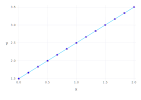

In [153]:
plot(p1,p2,p3)

The two methods give identical results--makes me wonder why we bothered.  

Let's try both methods on the IVP
$$
   \frac{\mathrm{d} y}{ \mathrm{d} t}  = y, \quad y =  1 \text{  when } t = 0
$$   
 The solution to the IVP is
$$
    y(t) = \exp(t)
$$
We'll use $t_0 = 0, y_0 = 1, t_f = 2$, and $N = 20.$

In [154]:
F, t0, y0, tf, N = (t,y) -> y, 0.0, 1.0, 2.0, 20;

In [155]:
X, Y = euler_method(F, t0,y0, tf, N);

In [156]:
XX, YY = rk1(F,  t0,y0, tf, N);

OK-for this IVP, the Euler method and the RK-1 method give somewhat different values.  Let's look at them graphically. But first, let's create arrays of the exact solution:

In [157]:
Xe = [t0 + (tf - t0) * k /N for k in 0:N];

In [158]:
Ye = map(t -> y0* exp(t), Xe);

In [159]:
using Gadfly

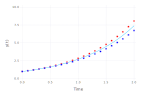

In [160]:
plot(layer(x=X, y=Y,Geom.point, color=[colorant"blue"] ), layer(x=XX, y=YY, color=[colorant"red"],Geom.point),
        layer(x = Xe, y = Ye,Geom.line),Guide.xlabel("Time"), Guide.ylabel("y(t)"))

The Euler method (blue dots) are uniformly _below_ the true solution and and the RK-1 method (red dots) are 
_uniformly_ above the true solution. This suggests using the average of the two methods.  What might that be?  The average of the left point integration rule and the right point rule is the trapezoidal rule.  That, to me, sounds like homework.

Finally, we show that if we make the step size large, the RK-1 method can give a terribly inaccurate result.  For the IVP
$$
   \frac{\mathrm{d} y}{ \mathrm{d} t} \mathrm{d} t = -y, \quad y =  1 \text{  when } t = 0
$$
The solution to the IVP is
$$
    y(t) = \exp(-t)
$$
We'll use $t_0 = 0, y_0 = 1, t_f = 11$, and $N = 10$. That gives a step size of 1.1.  

In [161]:
F, t0, y0, tf, N = (t,y) -> -y, 0.0, 1.0, 11.0, 10;

In [162]:
Xe = [t0 + (tf - t0) * k /N for k in 0:N];

In [163]:
Ye = map(t -> y0 * exp(-t), Xe);

In [164]:
XX, YY = rk1(F,  t0, y0, tf, N);

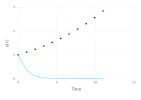

In [165]:
plot(layer(x=XX, y=YY,Geom.point, color=[colorant"blue"] ), layer(x = Xe, y = Ye,Geom.line),Guide.xlabel("Time"), Guide.ylabel("y(t)"))

A giant oops. For a step size of 1.1, the RK-1 solution grows exponentially, but true solution decays exponentially. We _desperately_ need a theory behind all this. Reducing the step size to 0.11 fixes this problem:

In [166]:
F, t0, y0, tf, N = (t,y) -> -y, 0.0, 1.0, 11.0, 40;

In [167]:
Xe = [t0 + (tf - t0) * k /N for k in 0:N];

In [168]:
Ye = map(t -> y0 * exp(-t), Xe);

In [169]:
XX, YY = rk1(F,  t0, y0, tf, N);

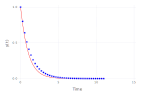

In [170]:
plot(layer(x=XX, y=YY,Geom.point, color=[colorant"blue"] ), 
     layer(x = Xe, y = Ye,Geom.line,color=[colorant"red"]),Guide.xlabel("Time"), Guide.ylabel("y(t)"))